In [1]:
# https://alphalens.ml4trading.io/notebooks/intraday_factor.html

import warnings
from random import random

import numpy as np

from data.data_loader import data_loader

warnings.filterwarnings('ignore')
import alphalens
import pandas as pd
%matplotlib inline

In [2]:
prices, metadata, categories = data_loader(timeframe='D',
                                    data_store='../data/crypto.h5',
                                    min_observation_years=2,
                                    drop_level=True,
                                    exclude_stablecoins=True,
                                    cut=False,
                                    downsampleshift=False,
                                    d_shift=5)
prices.info()
df = prices.swaplevel()

/D/../data/crypto.h5/2/True/False/False/True/False/5/True
load data
32
Index(['btc-usd', 'ltc-usd', 'eth-usd', 'etc-usd', 'zec-usd', 'xmr-usd',
       'dash-usd', 'xrp-usd', 'miota-usd', 'eos-usd', 'neo-usd', 'qtum-usd',
       'btg-usd', 'bat-usd', 'trx-usd', 'dai-usd', 'xlm-usd', 'mkr-usd',
       'bnt-usd', 'vet-usd', 'xtz-usd', 'dgb-usd', 'enj-usd', 'bsv-usd',
       'usdt-usd', 'pax-usd', 'usdc-usd', 'btt-usd', 'atom-usd', 'wbtc-usd',
       'leo-usd', 'algo-usd'],
      dtype='object', name='ticker')
Number tickers 32
Index(['btc-usd', 'ltc-usd', 'eth-usd', 'etc-usd', 'zec-usd', 'xmr-usd',
       'dash-usd', 'xrp-usd', 'miota-usd', 'eos-usd', 'neo-usd', 'qtum-usd',
       'btg-usd', 'bat-usd', 'trx-usd', 'dai-usd', 'xlm-usd', 'mkr-usd',
       'bnt-usd', 'vet-usd', 'xtz-usd', 'dgb-usd', 'enj-usd', 'bsv-usd',
       'usdt-usd', 'pax-usd', 'usdc-usd', 'btt-usd', 'atom-usd', 'wbtc-usd',
       'leo-usd', 'algo-usd'],
      dtype='object', name='ticker')
<class 'pandas.core.frame.Dat

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, btc-usd to algo-usd
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     32 non-null     category      
 1   market_cap             32 non-null     int16         
 2   name                   32 non-null     category      
 3   sector                 32 non-null     category      
 4   genesis_date           17 non-null     datetime64[ns]
 5   market_cap_rank        32 non-null     int16         
 6   hashing_algorithm      32 non-null     category      
 7   coingecko_rank         32 non-null     int16         
 8   coingecko_score        32 non-null     float32       
 9   developer_score        32 non-null     float32       
 10  community_score        32 non-null     float32       
 11  liquidity_score        32 non-null     float32       
 12  public_interest_score  32 non-null     float32       
dtype

In [4]:
today_close = df.loc[:, 'close'].unstack('ticker')

In [5]:
factor_shape = today_close.stack('ticker')
factor = pd.DataFrame(data=2 * np.random.random(factor_shape.shape) - 1,
                                    index=factor_shape.index, columns=['uniform_random_factor'])
factor = factor.join(metadata['sector'])
factor = factor.unstack('ticker')
factor.head()

uniform_random_factor                                             \
ticker                  algo-usd atom-usd bat-usd bnt-usd bsv-usd   btc-usd   
date                                                                          
2013-04-01                   NaN      NaN     NaN     NaN     NaN -0.250920   
2013-04-02                   NaN      NaN     NaN     NaN     NaN  0.901429   
2013-04-03                   NaN      NaN     NaN     NaN     NaN  0.463988   
2013-04-04                   NaN      NaN     NaN     NaN     NaN  0.197317   
2013-04-05                   NaN      NaN     NaN     NaN     NaN -0.687963   

                                             ...  sector                    \
ticker     btg-usd btt-usd dai-usd dash-usd  ... trx-usd usdc-usd usdt-usd   
date                                         ...                             
2013-04-01     NaN     NaN     NaN      NaN  ...     NaN      NaN      NaN   
2013-04-02     NaN     NaN     NaN      NaN  ...     NaN      NaN      NaN   
2013-04-03     NaN     NaN     NaN      NaN  ...     NaN      NaN      NaN   
2013-04-04     NaN     NaN     NaN      NaN  ...     NaN      NaN      NaN   
2013-04-05     NaN     NaN     NaN      NaN  ...     NaN      NaN      NaN   

                                                                     
ticker     vet-usd wbtc-usd xlm-usd xmr-usd xrp-usd xtz-usd zec-usd  
date                                                                 
2013-04-01     NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2013-04-02     NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2013-04-03     NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2013-04-04     NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2013-04-05     NaN      NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 64 columns]

In [6]:
factor.describe()

uniform_random_factor                                        \
ticker              algo-usd    atom-usd      bat-usd      bnt-usd   
count             734.000000  791.000000  1263.000000  1050.000000   
mean               -0.015413    0.024735    -0.009664     0.008754   
std                 0.573483    0.574613     0.577378     0.588284   
min                -0.999386   -0.996952    -0.998619    -0.999509   
25%                -0.516693   -0.475642    -0.517352    -0.510670   
50%                -0.014901    0.050916    -0.018157     0.031133   
75%                 0.474819    0.517936     0.497636     0.498754   
max                 0.999197    0.999579     0.999610     0.997389   

                                                                       \
ticker     bsv-usd      btc-usd      btg-usd     btt-usd      dai-usd   
count   936.000000  3006.000000  1334.000000  856.000000  1163.000000   
mean     -0.012266    -0.010927    -0.004028   -0.012379     0.002173   
std       0.574264     0.585405     0.554478    0.565828     0.583244   
min      -0.994956    -0.999546    -0.998810   -0.999201    -0.999640   
25%      -0.510328    -0.525506    -0.482488   -0.513826    -0.516166   
50%      -0.012553    -0.003377    -0.015263   -0.024911     0.002425   
75%       0.473515     0.496163     0.460678    0.468753     0.509836   
max       0.994853     0.998827     0.999850    0.999802     0.999018   

                     ...                                                    \
ticker     dash-usd  ...      trx-usd    usdc-usd    usdt-usd      vet-usd   
count   1574.000000  ...  1226.000000  916.000000  921.000000  1029.000000   
mean      -0.016234  ...     0.024737    0.028297    0.020670     0.021500   
std        0.592630  ...     0.563301    0.583783    0.575604     0.571542   
min       -0.998980  ...    -0.997360   -0.999865   -0.998293    -0.999610   
25%       -0.534344  ...    -0.436216   -0.456489   -0.438390    -0.450393   
50%       -0.035418  ...     0.025169    0.036271    0.023122     0.029226   
75%        0.515021  ...     0.510178    0.535671    0.509751     0.532597   
max        0.999115  ...     0.996304    0.998274    0.999391     0.997499   

                                                                       \
ticker    wbtc-usd      xlm-usd      xmr-usd      xrp-usd     xtz-usd   
count   783.000000  1150.000000  1667.000000  1497.000000  992.000000   
mean      0.017579     0.004107     0.000404    -0.015583   -0.019025   
std       0.570106     0.595488     0.572038     0.580130    0.584605   
min      -0.999518    -0.999340    -0.999750    -0.999514   -0.997149   
25%      -0.462116    -0.535144    -0.493195    -0.518007   -0.519570   
50%       0.018804     0.023784     0.019146    -0.007522   -0.031106   
75%       0.500042     0.546333     0.483862     0.497217    0.487175   
max       0.998357     0.996349     0.995569     0.999313    0.999781   

                     
ticker      zec-usd  
count   1699.000000  
mean       0.015022  
std        0.586653  
min       -0.999939  
25%       -0.505712  
50%        0.021660  
75%        0.530029  
max        0.999394  

[8 rows x 32 columns]

In [7]:
pricing = today_close.shift(-1)
pricing.head()

ticker,algo-usd,atom-usd,bat-usd,bnt-usd,bsv-usd,btc-usd,btg-usd,btt-usd,dai-usd,dash-usd,...,trx-usd,usdc-usd,usdt-usd,vet-usd,wbtc-usd,xlm-usd,xmr-usd,xrp-usd,xtz-usd,zec-usd
date,,,,,,,,,,,,,,,,,,,,,
2013-04-01,NaN,NaN,NaN,NaN,NaN,117.330002,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,NaN,NaN,NaN,NaN,NaN,134.699997,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-03,NaN,NaN,NaN,NaN,NaN,132.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-04,NaN,NaN,NaN,NaN,NaN,142.046204,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN,NaN,NaN,143.050003,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
factor = factor.stack()
factor.index = factor.index.set_names(['date', 'ticker'])

In [9]:
factor.head()

,,uniform_random_factor,sector
date,ticker,,
2013-04-01,btc-usd,-0.250920,Cryptocurrency
2013-04-02,btc-usd,0.901429,Cryptocurrency
2013-04-03,btc-usd,0.463988,Cryptocurrency
2013-04-04,btc-usd,0.197317,Cryptocurrency
2013-04-05,btc-usd,-0.687963,Cryptocurrency


In [10]:
non_predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor['uniform_random_factor'],
                                                                                  pricing,
                                                                                  periods=(1, 2),
                                                                                  max_loss=0.3,
                                                                                  groupby=factor['sector']
                                                                                  )

Dropped 0.3% entries from factor data: 0.2% in forward returns computation and 0.1% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 30.0%, not exceeded: OK!


Returns Analysis


,1D,2D
Ann. alpha,-0.071,-0.051
beta,0.003,0.032
Mean Period Wise Return Top Quantile (bps),-4.283,-3.730
Mean Period Wise Return Bottom Quantile (bps),2.735,1.676
Mean Period Wise Spread (bps),-7.019,-4.300


<Figure size 432x288 with 0 Axes>

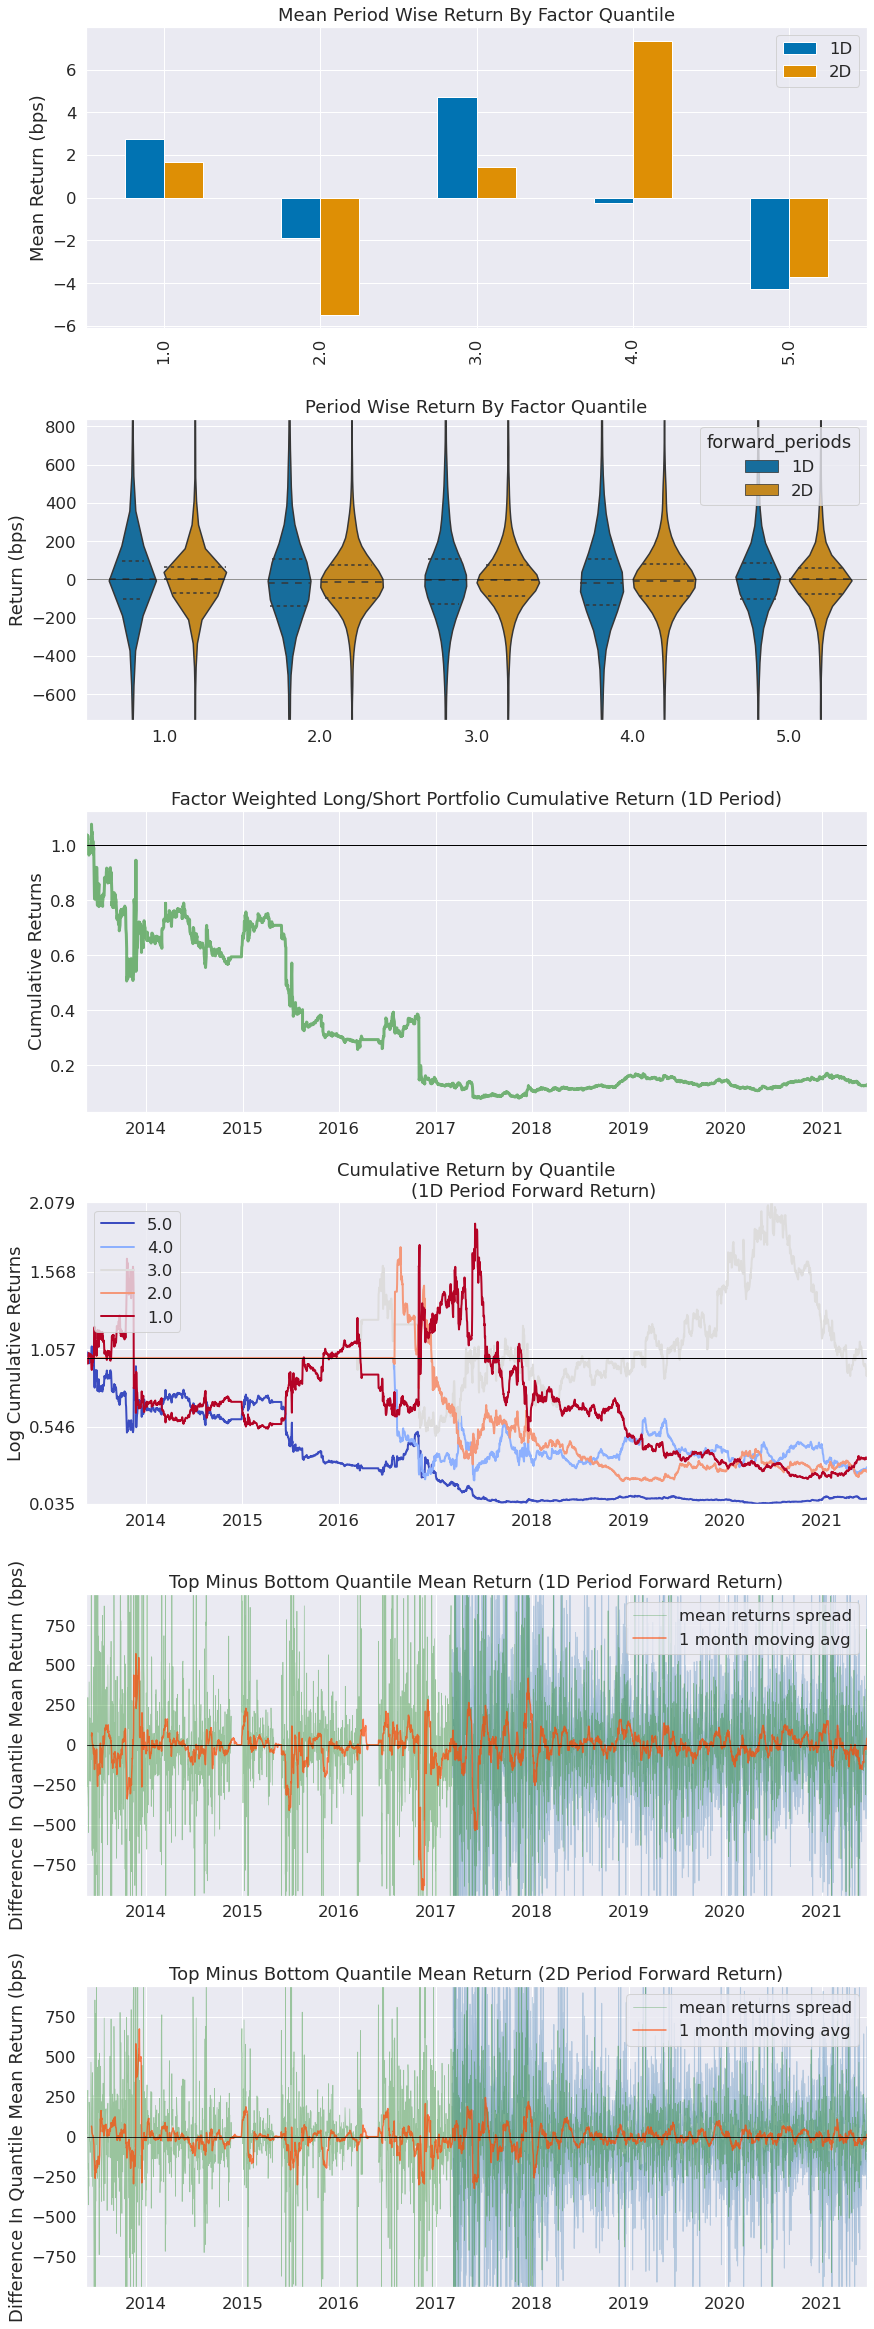

In [11]:
alphalens.tears.create_returns_tear_sheet(non_predictive_factor_data)